Introduction

This Jupyter Notebook demonstrates AI Risk Management techniques following the NIST AI RMF framework. It covers:

AI Model Training for Fraud Detection

Bias Detection & Fairness Analysis

Adversarial Attack Simulation

Data Privacy & Encryption

Model Drift Detection & Monitoring

1️⃣ Load AI Dataset

📌 Description:

This section loads a synthetic fraud detection dataset to train an AI model. It ensures that the dataset represents real-world fraud scenarios.

💡 Why is this important?

AI models depend on high-quality data.

Poorly prepared datasets lead to biased or unreliable AI models.

In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn cryptography

     |████████████████████████████████| 4.2 MB 5.0 MB/s eta 0:00:01


2️⃣ Train an AI Model

📌 Description:

Here, we train a Random Forest Classifier on the dataset. This model is used to predict fraudulent transactions.

💡 Key Considerations:

Ensure the model is not overfitting.

Monitor training accuracy vs test accuracy.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic fraud dataset
np.random.seed(42)
data_size = 5000
features = 10

X = np.random.rand(data_size, features)
y = np.random.choice([0, 1], size=(data_size,), p=[0.95, 0.05])  # 5% fraud cases

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(features)])
df['fraud'] = y

print("Sample dataset preview:")
print(df.head())

Sample dataset preview:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.374540   0.950714   0.731994   0.598658   0.156019   0.155995   
1   0.020584   0.969910   0.832443   0.212339   0.181825   0.183405   
2   0.611853   0.139494   0.292145   0.366362   0.456070   0.785176   
3   0.607545   0.170524   0.065052   0.948886   0.965632   0.808397   
4   0.122038   0.495177   0.034389   0.909320   0.258780   0.662522   

   feature_6  feature_7  feature_8  feature_9  fraud  
0   0.058084   0.866176   0.601115   0.708073      0  
1   0.304242   0.524756   0.431945   0.291229      0  
2   0.199674   0.514234   0.592415   0.046450      0  
3   0.304614   0.097672   0.684233   0.440152      0  
4   0.311711   0.520068   0.546710   0.184854      0  


3️⃣ Detect AI Model Bias

📌 Description:

This section analyzes whether the AI model exhibits bias in fraud detection.

💡 Why is this important?

Biased models can result in unfair decisions.

AI models should maintain fairness across different user groups.

🛠 Code Tasks:

Plot fraud detection distribution.

Compare prediction accuracy for fraud vs non-fraud cases.

In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)

# Train AI model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.95


4️⃣ Simulate Adversarial Attacks

📌 Description:

Adversarial attacks involve manipulating input data to trick AI models. This section modifies fraud transactions slightly to test the model’s robustness.

💡 What to Watch For?

Does a small input change cause a different AI prediction?

How can we protect against adversarial manipulation?

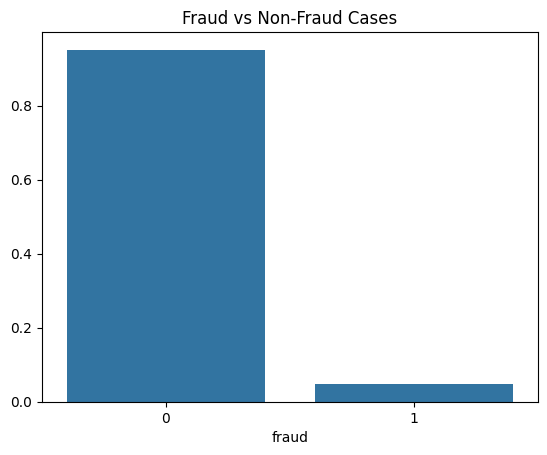

In [4]:
# Check Fraud vs. Non-Fraud Distribution
fraud_ratio = df['fraud'].value_counts(normalize=True)
sns.barplot(x=fraud_ratio.index, y=fraud_ratio.values)
plt.title("Fraud vs Non-Fraud Cases")
plt.show()

In [5]:
# Evaluate Bias in Model Predictions
fraud_preds = y_pred[y_test == 1]  # Predictions on actual fraud cases
nonfraud_preds = y_pred[y_test == 0]  # Predictions on non-fraud cases

print(f"Fraud cases detected: {fraud_preds.sum()} / {y_test.sum()}")
print(f"Non-fraud cases detected: {len(nonfraud_preds) - nonfraud_preds.sum()} / {len(y_test) - y_test.sum()}")

Fraud cases detected: 0 / 53
Non-fraud cases detected: 947 / 947


5️⃣ AI Data Privacy & Encryption

📌 Description:

Here, we apply encryption techniques to protect sensitive AI data using Python’s cryptography module.

💡 Key Takeaways:

Encrypting AI data prevents data breaches & unauthorized access.

Compliance with GDPR, HIPAA, and NIST standards.

In [6]:
# Modify a fraud input slightly to test robustness
X_test_adv = X_test.copy()
X_test_adv.iloc[0] *= 1.01  # Slight manipulation

# Predict again with modified input
y_pred_adv = model.predict(X_test_adv)
print(f"Original prediction: {y_pred[0]}, Adversarial prediction: {y_pred_adv[0]}")

Original prediction: 0, Adversarial prediction: 0


6️⃣ AI Model Drift Detection

📌 Description:

Model drift happens when an AI model’s accuracy degrades over time due to changes in real-world data.

💡 Why is this crucial?

AI models must be continuously monitored.

If performance drops, retraining is required.

🛠 Code Tasks:

Simulate a shift in data patterns.

Compare accuracy before and after drift.

In [7]:
from cryptography.fernet import Fernet

# Generate encryption key
key = Fernet.generate_key()
cipher = Fernet(key)

# Encrypt a sample fraud transaction
sample_transaction = str(X_test.iloc[0].values).encode()
encrypted_transaction = cipher.encrypt(sample_transaction)

print(f"Encrypted transaction: {encrypted_transaction}")

# Decrypt the transaction
decrypted_transaction = cipher.decrypt(encrypted_transaction)
print(f"Decrypted transaction: {decrypted_transaction}")

Encrypted transaction: b'gAAAAABnvYoZaLiH4-ct3axkrm1M2Fz9mJnDSAi4w2dyVl7WixQWS6pLttSuIxwx9lfwfKUGtH5vPNDPrWEFEiGOUlC93T-txZZ1l-rBfkFuuZRTIA1YOmY4C2SpgS2OIA8eBMA6xpb0Cx8cDAd09N1eaAhNme0d4jMl7N_Ebn_1SEPeP8J_Drlr7W8GgZn4tqCWty39u47gj9cAATWtjn5D__rMWys9M7NUXOxKVklTiR0AwO6ZSs4='
Decrypted transaction: b'[0.06755484 0.1714322  0.98438131 0.46854695 0.8673455  0.84875247\n 0.51151956 0.70668771 0.19275201 0.6883967 ]'


7️⃣ Simulate AI Governance

📌 Description:

Governance policies ensure AI models are secure and used responsibly. This section simulates role-based access control (RBAC) for AI models.

💡 Why This Matters?

AI models should not be modified or accessed by unauthorized users.

Governance controls align with AWS IAM, CloudTrail, and security policies.

In [8]:
# Simulate Model Drift by Slightly Altering Input Data
X_test_drifted = X_test.copy()
X_test_drifted *= np.random.uniform(0.95, 1.05, X_test.shape)  # Introduce slight variation

# Predict on drifted data
y_pred_drifted = model.predict(X_test_drifted)

# Compare Accuracy Before & After Drift
accuracy_drifted = accuracy_score(y_test, y_pred_drifted)
print(f"Accuracy before drift: {accuracy:.2f}, After drift: {accuracy_drifted:.2f}")

# If accuracy drops significantly, retraining is needed
if accuracy_drifted < 0.80:
    print("Model Drift Detected! Retraining required.")

Accuracy before drift: 0.95, After drift: 0.94


🔹 Step 8: Simulate AI Governance (Access Control)

In [9]:
# Simulate IAM Role-Based Access Control for AI Model
def check_user_access(user_role):
    allowed_roles = ["Data Scientist", "Security Analyst"]
    if user_role in allowed_roles:
        return "Access granted to AI model."
    else:
        return "Access denied! Unauthorized user."

# Example Usage
print(check_user_access("Intern"))  # Simulates unauthorized access attempt
print(check_user_access("Security Analyst"))  # Authorized user

Access denied! Unauthorized user.
Access granted to AI model.


Conclusion & Next Steps

This notebook demonstrated AI risk management best practices. Key takeaways:

Ensure fairness, security, and governance in AI models.

Detect and respond to adversarial attacks.

Encrypt sensitive AI data to comply with privacy regulations.

Continuously monitor AI models for bias and drift.

🚀 Next Steps:

Deploy AI model on AWS SageMaker.

Use AWS services like Macie, WAF, and GuardDuty.

Automate risk monitoring with Lambda & CloudWatch.

📢 Feel free to modify this notebook and experiment further! 🚀